<a href="https://colab.research.google.com/github/akashgardas/Data-Science/blob/main/Linear%20Regression/SimpleLinearRegressionWithOutlierDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [25]:
# DataSet
X = np.array([2,3,4,5,6,7,8,9,10,9])  # Study Hours
Y = np.array([40,50,65,70,80,82,85,87,88,40])  # Exam Score

In [26]:
# Add constant for intercept in regression
X_const = sm.add_constant(X)

In [27]:
# Fit the regression model
model = sm.OLS(Y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3.812
Date:                Fri, 22 Aug 2025   Prob (F-statistic):             0.0867
Time:                        08:17:57   Log-Likelihood:                -41.221
No. Observations:                  10   AIC:                             86.44
Df Residuals:                       8   BIC:                             87.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8238     13.791      3.178      0.013      12.022      75.626
x1             3.9486      2.022      1.952      0.087      -0.715       8.612
==============================================================================
Omnibus:                       13.588   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.664
Skew:                          -1.738   Prob(JB):                       0.0357
Kurtosis:                       4.978   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Predictions
Y_pred = model.predict(X_const)
Y

array([40, 50, 65, 70, 80, 82, 85, 87, 88, 40])

In [29]:
# Residuals
residuals = Y - Y_pred
residuals

array([-11.72099853,  -5.66960352,   5.38179148,   6.43318649,
        12.4845815 ,  10.53597651,   9.58737151,   7.63876652,
         4.69016153, -39.36123348])

In [30]:
# Standardized residuals
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
standardized_residuals

array([-0.88587508, -0.39488186,  0.3556007 ,  0.41203373,  0.78909272,
        0.66811737,  0.62033015,  0.51399171,  0.33613527, -2.64850977])

In [33]:
# Dataframe Creation
df = pd.DataFrame({
    'Study Hours': X,
    'Exam Score': Y,
    'Predicted Score': Y_pred,
    'Residuals': residuals,
    'Std Residuals': standardized_residuals
    })
df

,Study Hours,Exam Score,Predicted Score,Residuals,Std Residuals
0,2,40,51.720999,-11.720999,-0.885875
1,3,50,55.669604,-5.669604,-0.394882
2,4,65,59.618209,5.381791,0.355601
3,5,70,63.566814,6.433186,0.412034
4,6,80,67.515419,12.484581,0.789093
5,7,82,71.464023,10.535977,0.668117
6,8,85,75.412628,9.587372,0.620330
7,9,87,79.361233,7.638767,0.513992
8,10,88,83.309838,4.690162,0.336135
9,9,40,79.361233,-39.361233,-2.648510


In [42]:
# Outlier detection |Std Residual| > 2
outliers = df[np.abs(df['Std Residuals']) > 2]
outliers

,Study Hours,Exam Score,Predicted Score,Residuals,Std Residuals
9,9,40,79.361233,-39.361233,-2.64851


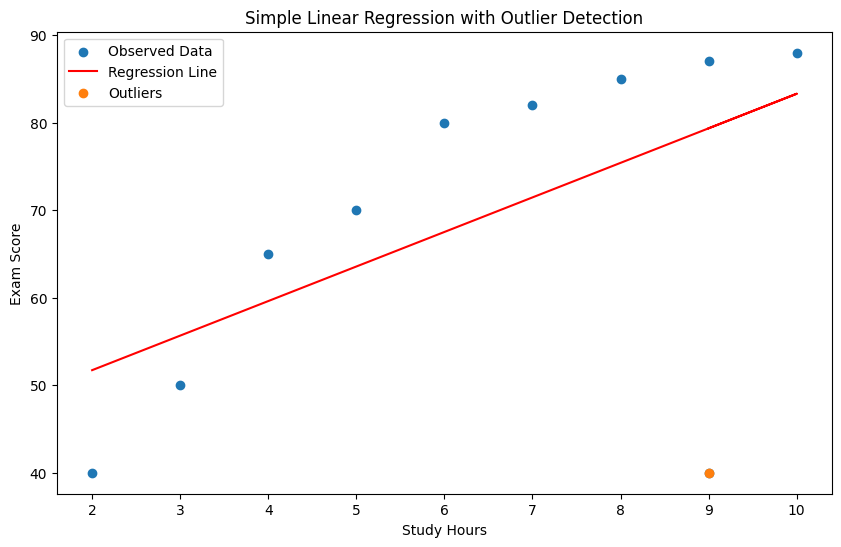

In [52]:
# Plot
plt.figure(figsize=(10, 6))

# Observed data
plt.scatter(X, Y, label='Observed Data')

# Regression line
plt.plot(X, Y_pred, label='Regression Line', color='red')

# Outliers
plt.scatter(outliers['Study Hours'], outliers['Exam Score'], label='Outliers')

plt.title('Simple Linear Regression with Outlier Detection')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()